In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# cheking null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# converting categorical columns to numerical columns


df['sex'] = df['sex'].replace({'female': 0, 'male': 1})

In [10]:
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df['region'] = df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


# Exploratory Data analysis

In [18]:
cols = df.columns.values.tolist()
cols

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

IndexError: list index out of range

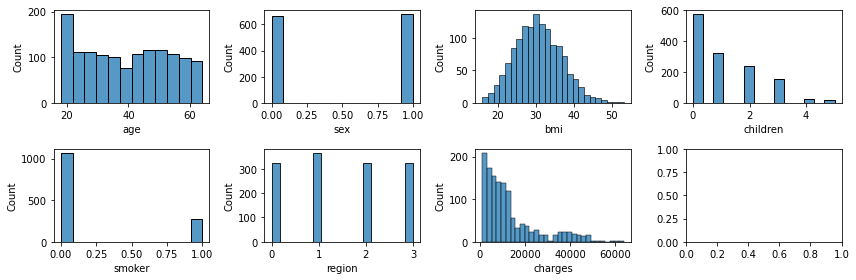

In [23]:
# histogram

rows = 2
columns = 4
fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(12,4))
counter = 0
for i in range(rows):
    for j in range(columns):
        sns.histplot(x=df[cols[counter]], ax=ax[i][j])
        plt.tight_layout()
        counter +=1

IndexError: list index out of range

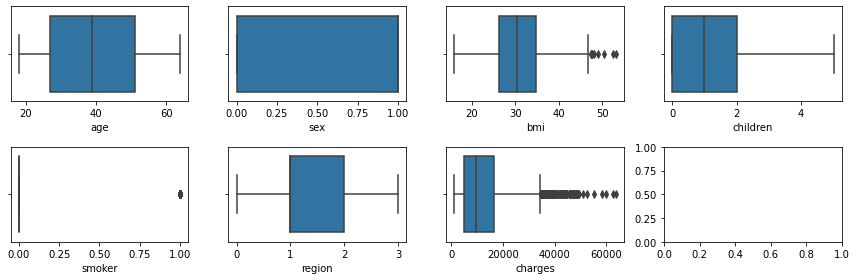

In [26]:
# boxplot
rows = 2
columns = 4
fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(12,4))
counter = 0
for i in range(rows):
    for j in range(columns):
        sns.boxplot(x=df[cols[counter]], ax=ax[i][j])
        plt.tight_layout()
        counter +=1

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

IndexError: list index out of range

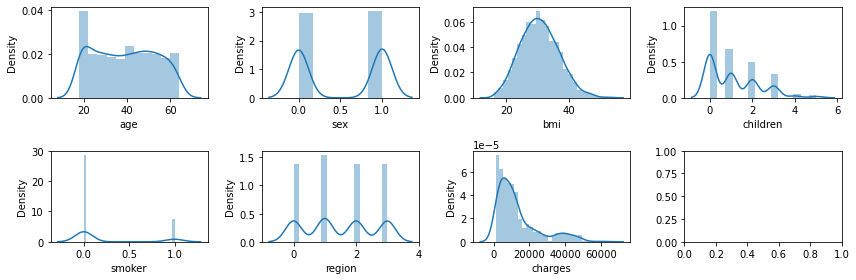

In [30]:
rows = 2
columns = 4
fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(12,4))
counter = 0
for i in range(rows):
    for j in range(columns):
        dist = sns.distplot(x=df[cols[counter]], ax=ax[i][j])
        dist.set(xlabel=cols[counter], ylabel="Density")
        plt.tight_layout()
        counter +=1

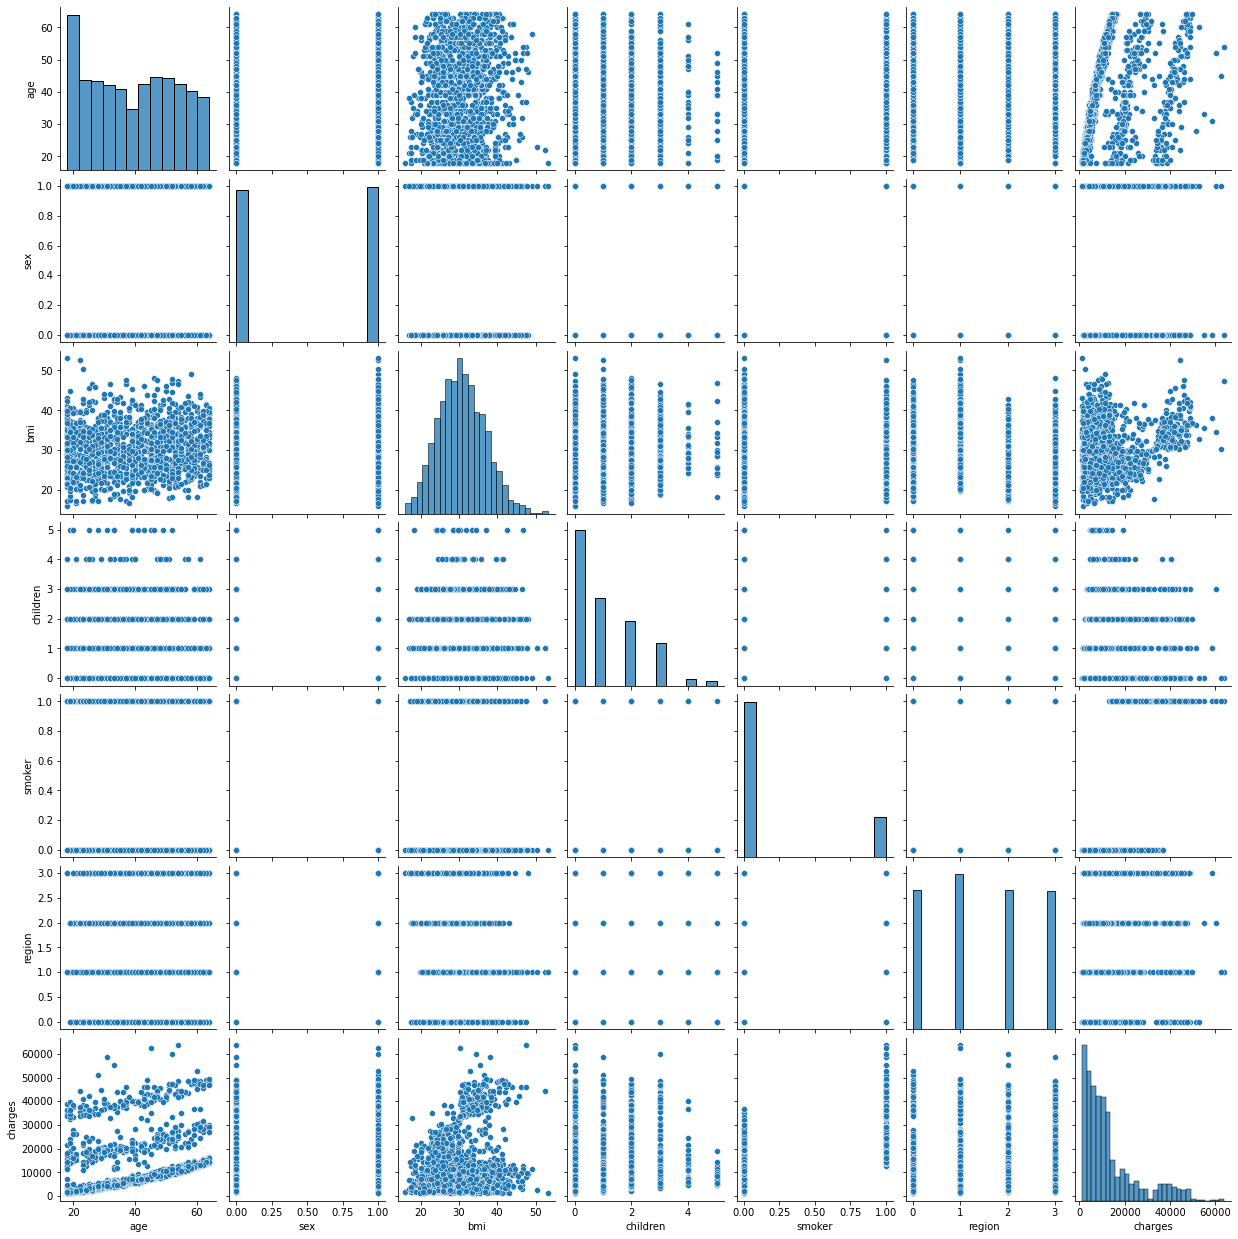

In [31]:
# pairplot
sns.pairplot(df)

# model building



In [33]:
# feature mapping

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [34]:
# feature normalization

def feature_normalization(X, mean=np.zeros(1), std=np.zeros(1)):
    
    X = np.array(X)
    if len(mean) == 1 or len(std) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    
    X = (X-mean) / std
    return X, mean, std

In [54]:
cols.remove('charges')

In [55]:
X_norm, mean, std = feature_normalization(df[cols])

In [56]:
X_norm.shape

(1338, 6)

In [57]:
cols

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [58]:
df2 = pd.DataFrame()
df2['age'] = X_norm[:,0]
df2['sex'] = X_norm[:,1]
df2['bmi'] = X_norm[:,2]
df2['children'] = X_norm[:,3]
df2['smoker'] = X_norm[:,4]
df2['region'] = X_norm[:,5]

In [59]:
df2['charges'] = df['charges']
df2

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.343905,16884.92400
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.438495,1725.55230
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.438495,4449.46200
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.466915,21984.47061
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,0.466915,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,0.466915,10600.54830
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,1.372326,2205.98080
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,-0.438495,1629.83350
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,-1.343905,2007.94500


In [60]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,-1.853691e-16,1.000374,-1.509965,-0.869155,-0.014740,0.839674,1.765289
sex,1338.0,-7.567439e-17,1.000374,-1.010519,-1.010519,0.989591,0.989591,0.989591
bmi,1338.0,-1.869041e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,2.721623e-17,1.000374,-0.908614,-0.908614,-0.078767,0.751079,3.240619
smoker,1338.0,2.142448e-16,1.000374,-0.507463,-0.507463,-0.507463,-0.507463,1.970587
region,1338.0,-1.383630e-16,1.000374,-1.343905,-0.438495,-0.438495,0.466915,1.372326
charges,1338.0,1.327042e+04,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010


In [61]:
# setting values
m = df2.shape[0]
X = np.hstack((np.ones((m, 1)), X_norm))
y = np.array(df2.charges.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1], 1))


(7, 1)

In [62]:
def cost_function(X, y, theta):
    m = X.shape[0]
    h = X.dot(theta)
    h_diff = h -y
    cost = (1/(2*m)) * (h_diff.T.dot(h_diff))
    return cost

In [63]:
cost = cost_function(X, y, theta)
cost

array([[1.61323437e+08]])

In [65]:
alpha = [0.01, 0.03, 0.1, 0.3]
color = ['r', 'b', 'g', 'c']
num_iter = 100

In [67]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = X.shape[0]
    j_history = np.zeros(shape=(iterations, 1))
    
    for i in range(0, iterations):
        h = X.dot(theta)
        diff_h = h - y
        delta = (1/m) * (diff_h.T.dot(X))
        theta = theta - (alpha * delta.T)
        j_history[i] = cost_function(X, y, theta)
    return theta, j_history

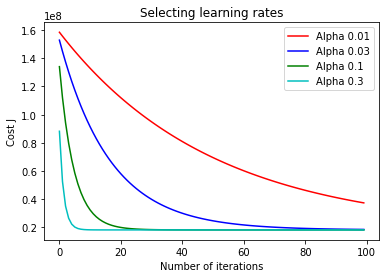

In [70]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1], 1))
    theta, j_history = gradientDescent(X, y, theta, alpha[i], num_iter)
    plt.plot(range(len(j_history)), j_history, color[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [104]:
opt_theta

array([[13270.06978416],
       [ 3613.41541866],
       [  -65.30857169],
       [ 2027.28022176],
       [  577.69667602],
       [ 9612.19221857],
       [  390.53196306]])

In [73]:
alpha = 0.1
num_iter = 100
theta = np.zeros(shape=(X.shape[1], 1))
opt_theta, costs = gradientDescent(X, y, theta, alpha, num_iter)
opt_theta

array([[13270.06978416],
       [ 3613.41541866],
       [  -65.30857169],
       [ 2027.28022176],
       [  577.69667602],
       [ 9612.19221857],
       [  390.53196306]])

In [80]:
y_pred = X.dot(opt_theta)

In [81]:
y_pred

array([[25110.12238902],
       [ 3687.87081773],
       [ 6963.39032491],
       ...,
       [ 4363.39308176],
       [ 1106.80631892],
       [37012.14364543]])

Text(0, 0.5, 'Predicted Values')

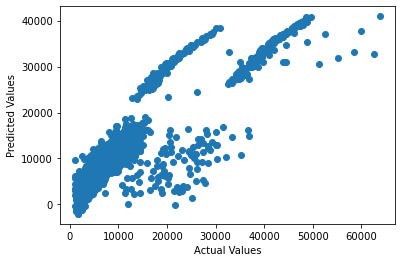

In [103]:
plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_norm, df2.charges.values.reshape(-1,1))

LinearRegression()

In [83]:
lr.coef_

array([[3613.53615057,  -65.55170114, 2027.3168105 ,  577.66033542,
        9612.57306988,  390.58548034]])

In [84]:
lr.intercept_

array([13270.42226514])

In [86]:
costs[-1]

array([18263830.10927835])

In [87]:
y_pred = lr.predict(X_norm)
y_pred

array([[25111.24186363],
       [ 3687.60517284],
       [ 6963.14570669],
       ...,
       [ 4363.66236622],
       [ 1106.98661296],
       [37013.72809551]])

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2Score = r2_score(y, y_pred)

In [105]:
print(f"Mean squared Error {mse/2}\nMean absolute Error {mae}\nR squared Error {r2Score}\n")

Mean squared Error 18263829.94284119
Mean absolute Error 4172.487114944051
R squared Error 0.7507372027994937

